# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/justmarkham/DAT4-students/blob/master/kerry/Final/NBA_players_2015.csv), [data dictionary](https://github.com/justmarkham/DAT-project-examples/blob/master/pdf/nba_paper.pdf)
- **Goal:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [2]:
# read the data into a DataFrame
import pandas as pd
path = 'C:/Users/byerj023/Documents/GA/GA_Data_Science_course/ds-sea-05/data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [3]:
# examine the columns
nba.columns

Index([u'season_end', u'player', u'pos', u'age', u'bref_team_id', u'g', u'gs',
       u'mp', u'fg', u'fga', u'fg_', u'x3p', u'x3pa', u'x3p_', u'x2p', u'x2pa',
       u'x2p_', u'ft', u'fta', u'ft_', u'orb', u'drb', u'trb', u'ast', u'stl',
       u'blk', u'tov', u'pf', u'pts', u'G', u'MP', u'PER', u'TS%', u'3PAr',
       u'FTr', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'OWS',
       u'DWS', u'WS', u'WS/48', u'OBPM', u'DBPM', u'BPM', u'VORP'],
      dtype='object')

In [4]:
# examine the positions
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [5]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [6]:
# create feature matrix (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [7]:
# alternative way to create X
X = nba.loc[:, 'ast':'pf']

In [8]:
# create response vector (y)
y = nba.pos_num

## Step 3: Train a KNN model (K=5)

In [9]:
# import class
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# instantiate with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
# fit with data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step 4: Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [12]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [13]:
# make a prediction
knn.predict([player])

array([2], dtype=int64)

In [14]:
# calculate predicted probabilities
knn.predict_proba([player])

array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [15]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)
knn.predict([player])

array([1], dtype=int64)

In [16]:
# calculate predicted probabilities
knn.predict_proba([player])

array([[ 0.06,  0.62,  0.32]])

## Bonus: Explore the features to decide which ones are predictive

In [17]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [19]:
# description of assists grouped by position
nba.groupby('pos').ast.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
pos,,,,,,,,
C,79.0,0.945570,0.858263,0.0,0.40,0.80,1.15,4.4
F,199.0,1.173367,1.086252,0.0,0.45,0.90,1.50,7.3
G,200.0,2.729000,2.128287,0.0,1.10,2.25,3.80,10.2


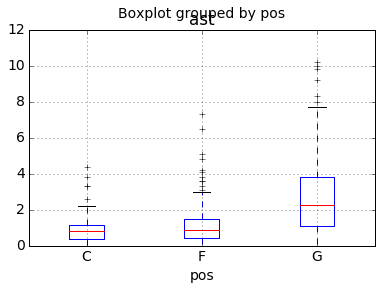

In [30]:
# box plot of assists grouped by position
nba.boxplot(column='ast', by='pos')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A72E550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B47F048>]], dtype=object)

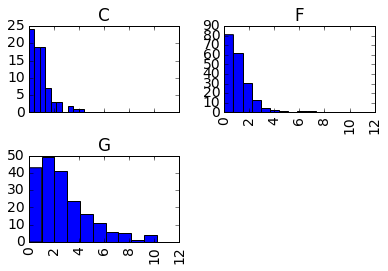

In [31]:
# histogram of assists grouped by position
nba.hist(column='ast', by='pos', sharex=True)